## Importing Relevant Libraries

In [1]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Numpy and Pandas
import numpy as np
import pandas as pd

from math import sqrt

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [2]:
# Read the dataset
bike_data = pd.read_csv(r'C:\Users\Indranil\Desktop\UpGrad\IIITB with UpGrad\Machine Learning 1\Linear Regression Assignment\day.csv',
                       parse_dates=['dteday'])

# Checking the first 5 rows of the dataframe
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the number of rows and columns of the dataframe
bike_data.shape

(730, 16)

In [4]:
# Checking the info of the dataframe
bike_data.info()

# Inference: There are no null values present in the dataset. 
# Also, one column is of 'date' type and all other columns are of 'int' or 'float' type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
# Checking the summary of the numerical cols present in the dataframe
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Missing value check
bike_data.isnull().sum()

# There are no missing values present in the data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Duplicate value check

bike_dup = bike_data
bike_dup.drop_duplicates(subset=None, inplace=True)

#Checking the shape
bike_dup.shape

# The shape is same as the original dataframe. Thus, there are no duplicate values present in the dataset.

(730, 16)

#### As per the data dictionary the following columns can be removed from the dataset:
- 'instant' - It is the record index value
- 'dteday' - It is the date column. Since, we already have 'yr' and 'mnth' columns present in the dataset, this column doesn't provide much information.
- 'casual' and 'registered' - The 'cnt' column is the count of total rental bikes including both casual and registered. Since, our dependent variable is 'cnt', we can drop these columns.

In [8]:
# Dropping redundant columns
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Checking the shape of the dataframe
bike_data.shape

(730, 12)

In [9]:
# Renaming the names of some of the columns for better understanding
bike_data.rename({'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count'}, axis=1, inplace=True)

# Checking the first 5 rows of the dataframe after renaming the columns
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Encoding of Columns and Visualizing the data

In [10]:
# Mapping 'season' column data to its actual values

bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Checking the % of records per season 
bike_data['season'].value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [11]:
# Mapping 'weathersit' column data to its actual values

bike_data['weathersit'] = bike_data['weathersit'].map({1:'clear', 2:'misty', 3:'light_rain_&_snow', 4:'heavy_rain_&_snow'})

# Checking the % of records per weather 
bike_data['weathersit'].value_counts(normalize=True)

clear                0.634247
misty                0.336986
light_rain_&_snow    0.028767
Name: weathersit, dtype: float64

In [12]:
# Mapping 'month' column data to its actual values
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bike_data['month'] = bike_data['month'].map(months)

# Checking the % of records per month 
bike_data['month'].value_counts(normalize=True)

Aug    0.084932
Jan    0.084932
Mar    0.084932
May    0.084932
Oct    0.084932
Dec    0.084932
Jul    0.084932
Jun    0.082192
Apr    0.082192
Nov    0.082192
Sep    0.082192
Feb    0.076712
Name: month, dtype: float64

In [13]:
# Mapping 'weekday' column data to its actual values
weekdays = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thr', 5:'Fri', 6:'Sat'}
bike_data['weekday'] = bike_data['weekday'].map(weekdays)

# Checking the % of records per weekday 
bike_data['weekday'].value_counts(normalize=True)

Mon    0.143836
Tue    0.143836
Wed    0.142466
Sun    0.142466
Sat    0.142466
Thr    0.142466
Fri    0.142466
Name: weekday, dtype: float64

### Visualizing Categorical Data using Boxplot

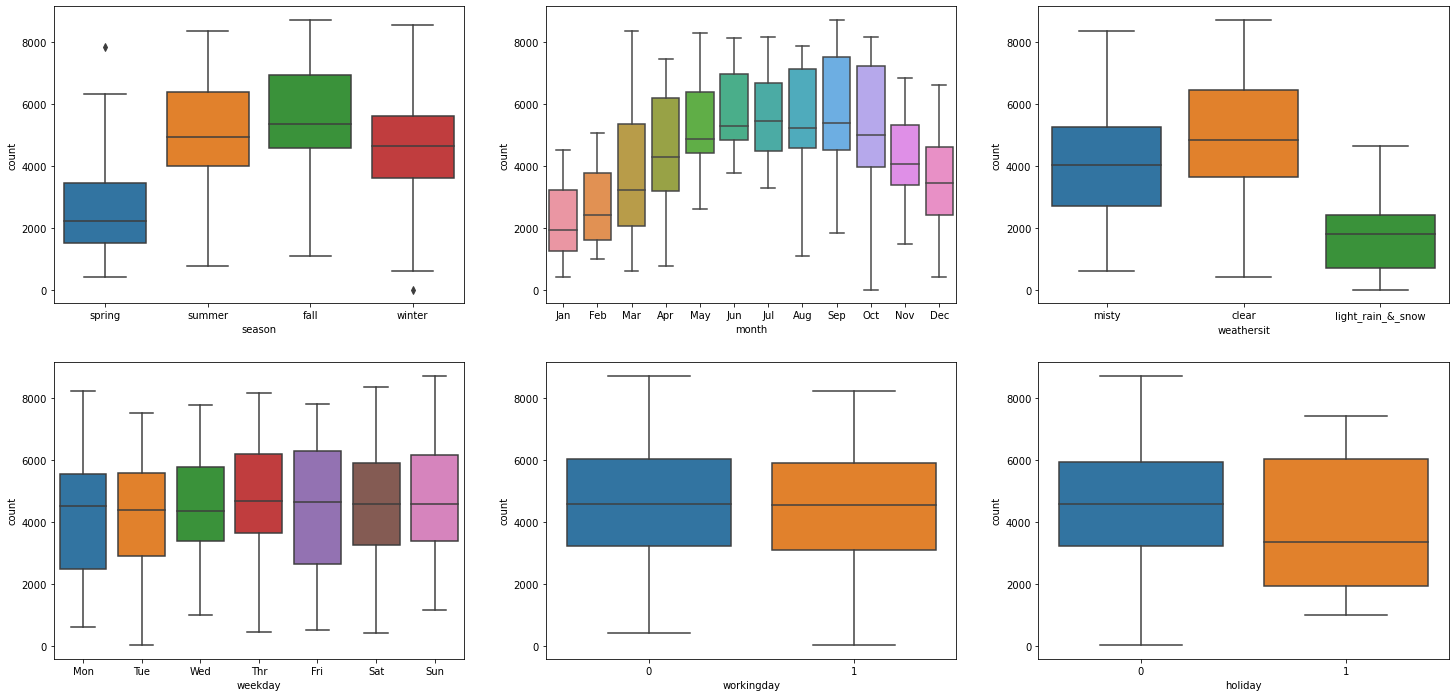

In [14]:
# Plotting a boxplot for all categorical data
plt.figure(figsize=(25, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y='count', data=bike_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'month', y='count', data=bike_data)

plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y='count', data=bike_data)

plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y='count', data=bike_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y='count', data=bike_data)

plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y='count', data=bike_data)

plt.show()

In [15]:
# Statistics of 'season' column
df_season = bike_data.groupby('season')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_season['count_%'] = round((df_season['count'] / df_season['count'].sum()) *100,2)
df_season['sum_%'] = round((df_season['sum'] / df_season['sum'].sum()) *100,2)
df_season

,count,sum,mean,count_%,sum_%
season,,,,,
fall,188,1061129,5644.303191,25.75,32.24
summer,184,918589,4992.331522,25.21,27.91
winter,178,841613,4728.162921,24.38,25.57
spring,180,469514,2608.411111,24.66,14.27


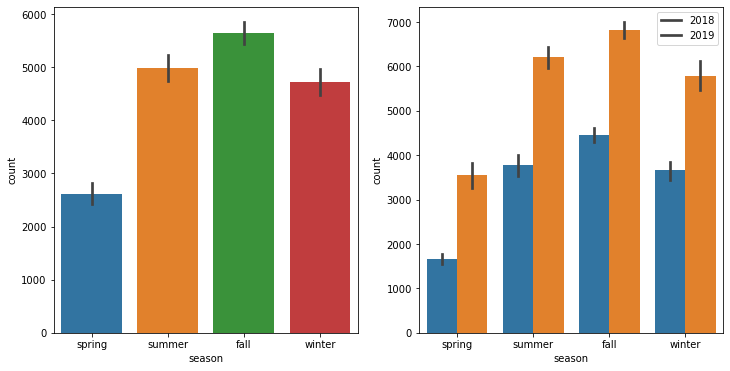

In [16]:
# 'Season' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'season', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'season', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Almost 32% bike rental bookings were happening in the fall season.
- Summer and Winter season saw booking percentage around 28% and 26%.
- Bookings increased in the year 2019 compared to the year 2018.

In [17]:
# Statistics of 'month' column
df_month = bike_data.groupby('month')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_month['count_%'] = round((df_month['count'] / df_month['count'].sum()) *100,2)
df_month['sum_%'] = round((df_month['sum'] / df_month['sum'].sum()) *100,2)
df_month

,count,sum,mean,count_%,sum_%
month,,,,,
Aug,62,351194,5664.419355,8.49,10.67
Jun,60,346342,5772.366667,8.22,10.52
Sep,60,345991,5766.516667,8.22,10.51
Jul,62,344948,5563.677419,8.49,10.48
May,62,331686,5349.774194,8.49,10.08
Oct,62,322352,5199.225806,8.49,9.80
Apr,60,269094,4484.900000,8.22,8.18
Nov,60,254831,4247.183333,8.22,7.74
Mar,62,228920,3692.258065,8.49,6.96


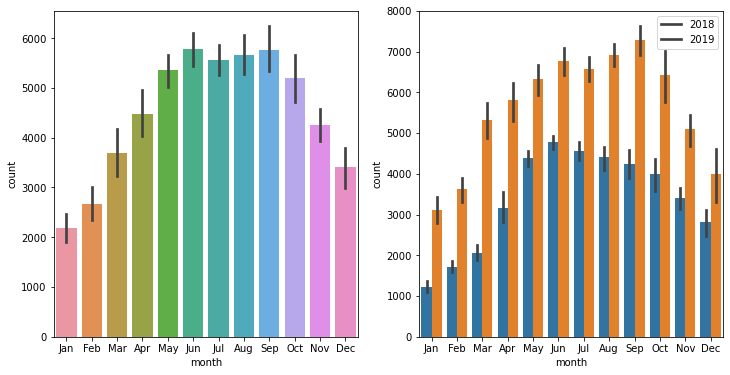

In [18]:
# 'Month' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'month', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'month', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- 10% of the bike bookings were happening in the months 'May' to 'September'.
- 'September' saw the maximum number of bookings in the year 2019.

In [19]:
# Statistics of 'weathersit' column
df_weather = bike_data.groupby('weathersit')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_weather['count_%'] = round((df_weather['count'] / df_weather['count'].sum()) *100,2)
df_weather['sum_%'] = round((df_weather['sum'] / df_weather['sum'].sum()) *100,2)
df_weather

,count,sum,mean,count_%,sum_%
weathersit,,,,,
clear,463,2257952,4876.786177,63.42,68.61
misty,246,995024,4044.813008,33.70,30.24
light_rain_&_snow,21,37869,1803.285714,2.88,1.15


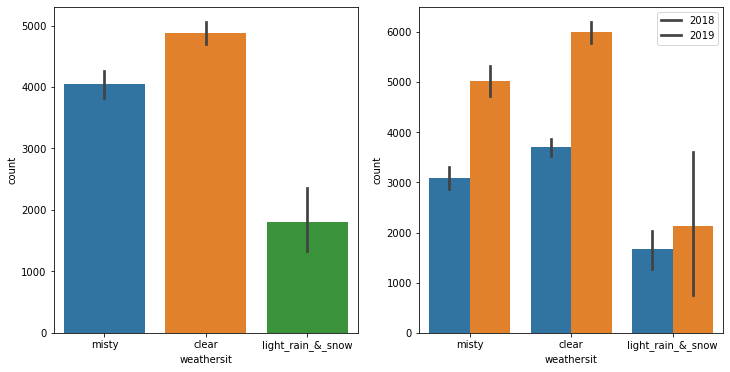

In [20]:
# 'Weathersit' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- 69% bike booking happened when the weather was clear.
- 30% bike booking happened when the weather was misty.
- As we saw earlier, bike booking increased in the year 2019 and maximum bookings were made when the weather was clear.

In [21]:
# Statistics of 'weekday' column
df_weekday = bike_data.groupby('weekday')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_weekday['count_%'] = round((df_weekday['count'] / df_weekday['count'].sum()) *100,2)
df_weekday['sum_%'] = round((df_weekday['sum'] / df_weekday['sum'].sum()) *100,2)
df_weekday

,count,sum,mean,count_%,sum_%
weekday,,,,,
Thr,104,487923,4691.567308,14.25,14.83
Sun,104,485235,4665.721154,14.25,14.74
Sat,104,481176,4626.692308,14.25,14.62
Fri,104,478132,4597.423077,14.25,14.53
Wed,104,462276,4444.961538,14.25,14.05
Tue,105,448822,4274.495238,14.38,13.64
Mon,105,447281,4259.819048,14.38,13.59


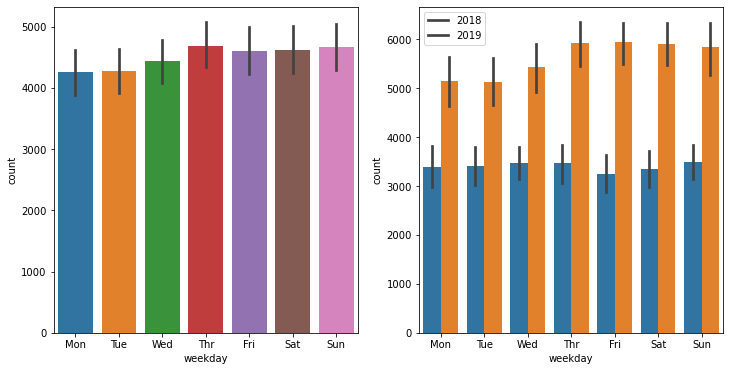

In [22]:
# 'Weekday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Almost all the days have 13.5% - 14.8% booking rate. 
- We can see that the number of bookings increased in the year 2019 and maximum bookings were made on 'Thr','Fri','Sat' and 'Sun'. But, since the values are so close to each other it is very difficult to conclude if this variable has an influence on the predictor variable.

In [23]:
# Statistics of 'workingday' column
df_working = bike_data.groupby('workingday')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_working['count_%'] = round((df_working['count'] / df_working['count'].sum()) *100,2)
df_working['sum_%'] = round((df_working['sum'] / df_working['sum'].sum()) *100,2)
df_working

,count,sum,mean,count_%,sum_%
workingday,,,,,
1,504,2253988,4472.198413,69.04,68.49
0,226,1036857,4587.862832,30.96,31.51


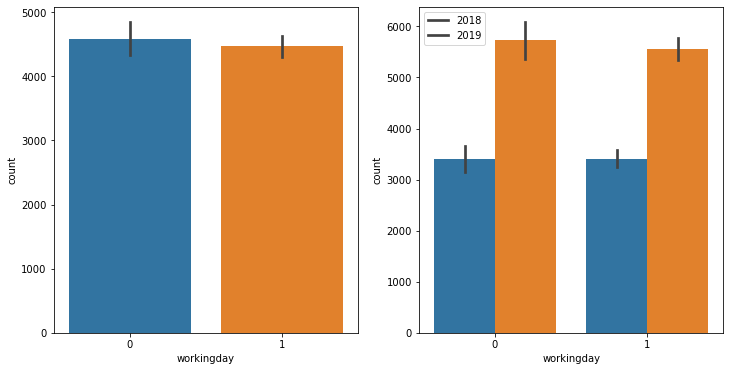

In [24]:
# 'Workingday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'workingday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Almost 69% of the bike bookings happened when it was a workingday.

In [25]:
# Statistics of 'holiday' column
df_holiday = bike_data.groupby('holiday')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_holiday['count_%'] = round((df_holiday['count'] / df_holiday['count'].sum()) *100,2)
df_holiday['sum_%'] = round((df_holiday['sum'] / df_holiday['sum'].sum()) *100,2)
df_holiday

,count,sum,mean,count_%,sum_%
holiday,,,,,
0,709,3212410,4530.90268,97.12,97.62
1,21,78435,3735.00000,2.88,2.38


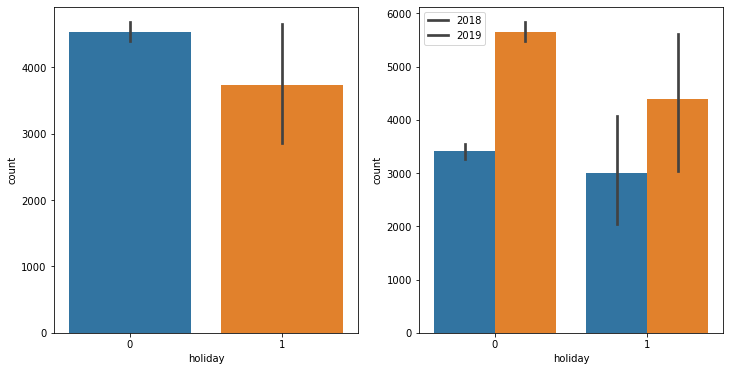

In [26]:
# 'Holiday' vs 'Count' Barplot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y='count', data=bike_data)

plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y='count', hue='year', data=bike_data)

plt.legend(labels = ['2018', '2019'])

plt.show()

### Inference:
- Almost 97% of the bike bookings happened when it was not a holiday.

In [27]:
# Statistics of 'year' column
df_year = bike_data.groupby('year')['count'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
df_year['count_%'] = round((df_year['count'] / df_year['count'].sum()) *100,2)
df_year['sum_%'] = round((df_year['sum'] / df_year['sum'].sum()) *100,2)
df_year

,count,sum,mean,count_%,sum_%
year,,,,,
1,365,2047742,5610.252055,50.0,62.23
0,365,1243103,3405.761644,50.0,37.77


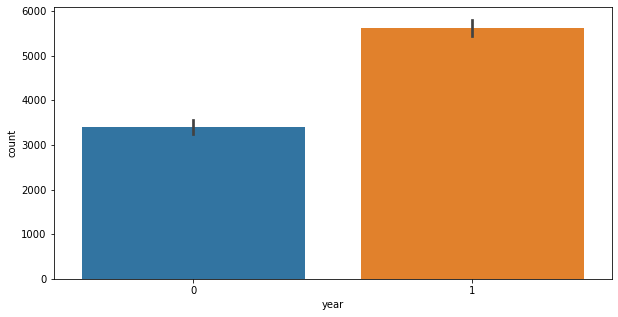

In [28]:
# 'Year' vs 'Count' Barplot
plt.figure(figsize=(10,5))
sns.barplot(x = 'year', y='count', data=bike_data)
plt.show()

### Inference:
- Bike rental demand has increased from 2018 to 2019.

## Numerical Variable Analysis

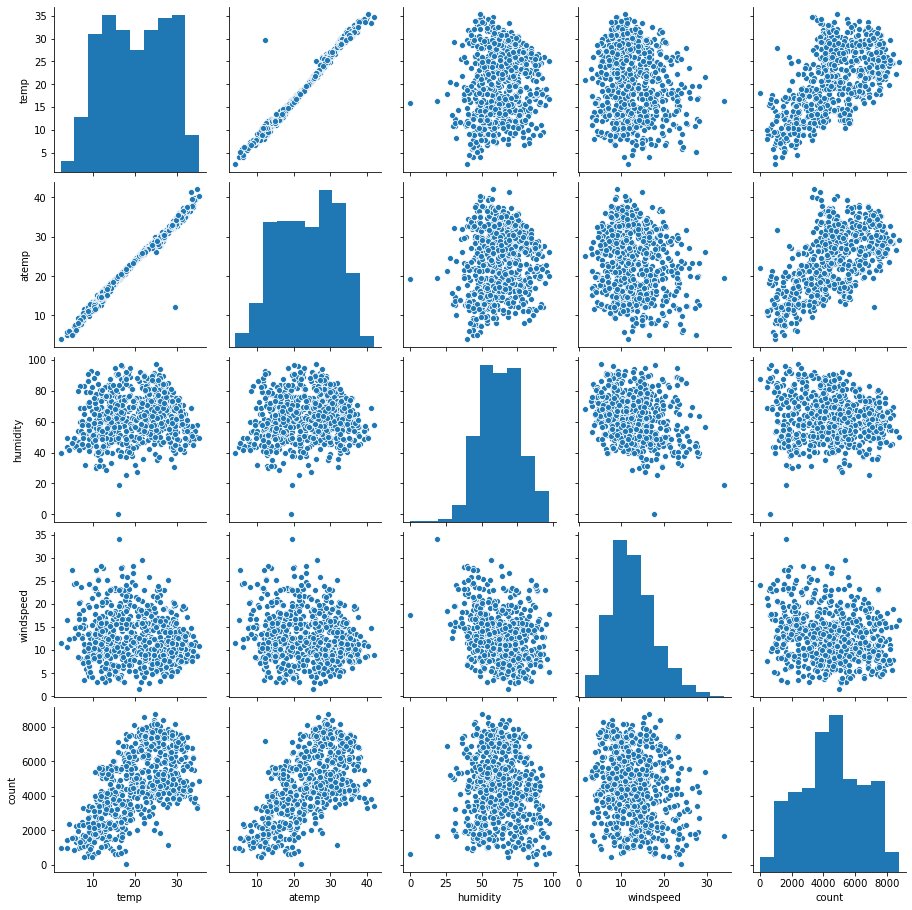

In [29]:
# Create a list of numerical variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

bike_numerical = bike_data[num_vars]

# Plot a pairplot for all numerical cols
sns.pairplot(bike_numerical);

### Inference:
- Bike rental counts show a positive correlation with 'temp' and 'atemp'.
- Bike rental counts show a negative correlation with 'humidity'.
- Bike rental counts show a negative correlation with 'windspeed'. 

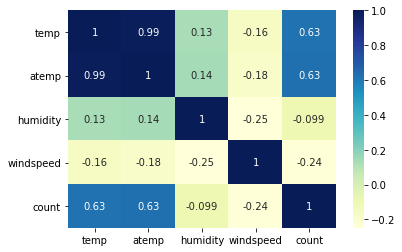

In [30]:
# Plotting a heatmap for all numerical cols.
sns.heatmap(bike_numerical.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Inference:
- 'temp' and 'atemp' variables are positively correlated with 'count'.
- 'humidity'and 'windspeed' variables are negatively correlated with 'count'.
- 'temp' and 'atemp' variables are highly correlated with each other and hence one of them must be dropped to avoid multi-collinearity.

## Data Preparation

In [31]:
# Creating dummy variables for 'season' column
seasons = pd.get_dummies(bike_data['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
# Creating dummy variables for 'weathersit' column
weather = pd.get_dummies(bike_data['weathersit'], drop_first=True)
weather.head()

,light_rain_&_snow,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
# Creating dummy variables for 'month' column
month = pd.get_dummies(bike_data['month'], drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [34]:
# Creating dummy variables for 'weekday' column
weekday = pd.get_dummies(bike_data['weekday'], drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thr,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [35]:
# Concatinating the dummy variables created with the original dataframe

bike_data = pd.concat([bike_data,seasons,weather,month,weekday], axis=1)

# Checking the first 5 rows of the dataframe
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
0,spring,0,Jan,0,Mon,1,misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thr,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Checking the shape of the dataframe
bike_data.shape

(730, 34)

In [37]:
# Dropping the categorical columns for which dummy variables are already created
bike_data.drop(['season', 'weathersit', 'month', 'weekday'], axis=1, inplace=True)

# Checking the shape of the dataframe
bike_data.shape

(730, 30)

In [38]:
# Checking the first 5 rows of the dataframe
bike_data.head()

# All the data in the dataframe are now numeric. We can use this data to build the model.

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into Train and Test

In [39]:
# Splitting the data into train and test
df_train, df_test = train_test_split(bike_data, train_size = 0.7, random_state=100)

#Checking the shape of 'df_train' dataframe
df_train.shape

(510, 30)

In [40]:
# Checking the shape of 'df_test' dataframe
df_test.shape

(220, 30)

In [41]:
# Rescaling 'df_train' dataframe

# Instantiate an object
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Fit the scaler on the data
df_train[cols] = scaler.fit_transform(df_train[cols])

# Checking whether the scaler has worked properly or not using describe
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


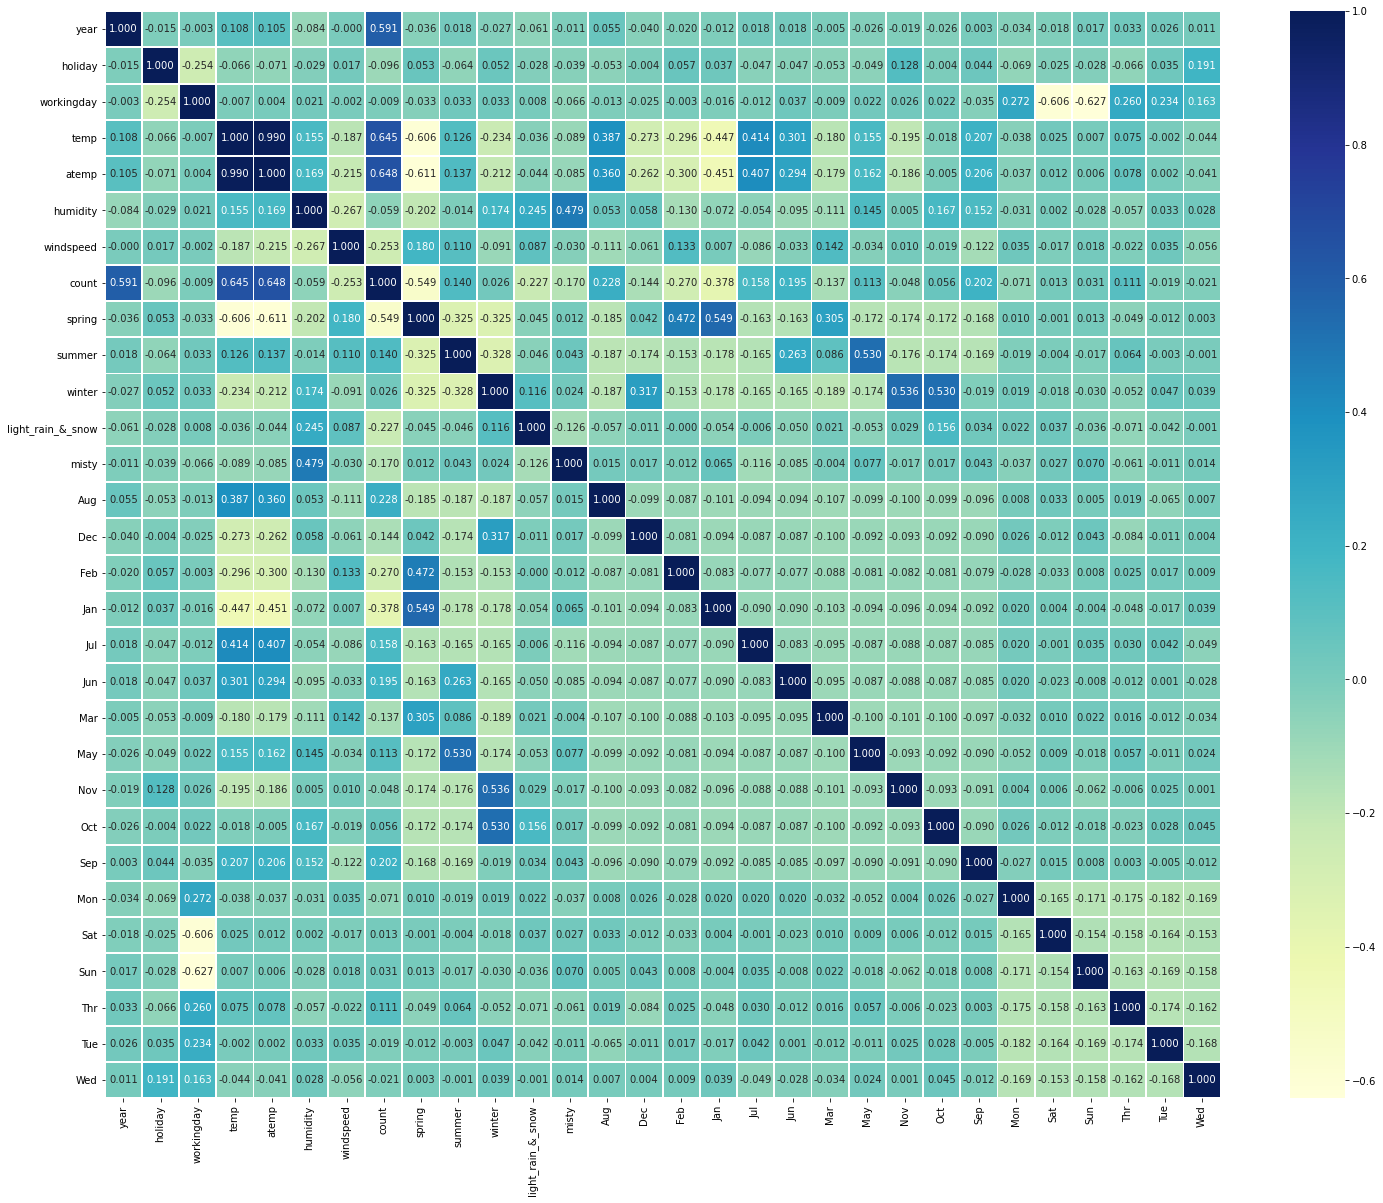

In [42]:
# Checking correlation using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', fmt='.3f', linewidths=1)
plt.show()

### Inference:
- 'temp', 'atemp' and 'year' have strong correlation with 'count'.
- 'Spring' season is negatively correlated with 'count'.
- 'temp' and 'atemp' are highly correlated with each other. Thus, we can use any one of the variables.
- 'humidity' and 'misty' weather are correlated with each other.
- 'Winter' and months 'Oct', 'Nov' and 'Dec' are correlated with each other.
- 'Workingday' has negative correlation with 'Sat' and 'Sun'.

## Training the model

- We would find out 15 variables by using an automated approach of RFE and then use manual approach to eliminate some other variabes based on 'p' and 'VIF' values.

In [43]:
# Splitting 'df_train' dataframe into 'X_train' and 'y_train'
y_train = df_train.pop('count')
X_train = df_train

In [44]:
# Feature selection using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with o/p number of variable equal to 15
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Checking the 15 predictor variables which have been selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain_&_snow', True, 1),
 ('misty', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thr', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11)]

In [46]:
# Storing the selected 15 cols in 'cols' list
cols = X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'light_rain_&_snow', 'misty', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep'],
      dtype='object')

In [47]:
# Checking the cols which are not selected by RFE
X_train.columns[~ rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

In [48]:
# Creating 'X_train' using cols selected by RFE
X_train_rfe = X_train[cols]

# Checking the first 5 rows of the dataframe
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,light_rain_&_snow,misty,Dec,Jan,Jul,Nov,Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0


## Building Linear Model using Statsmodel

In [49]:
# Since VIF needs to be calculated again and again, creating a function for VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i ) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

#### Model-1

In [50]:
# Adding a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr1 = sm.OLS(y_train, X_train_rfe1).fit()

# Summary for the fitted model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        23:26:16   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3197      0.036      8.859      0.000       0.249       0.391
year                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday              -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                  0.4815      0.037     13.005      0.000       0.409       0.554
humidity             -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed            -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring               -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                0.0423      0.015      2.761      0.006       0.012       0.072
winter                0.1019      0.018      5.656      0.000       0.067       0.137
light_rain_&_snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty                -0.0543      0.010     -5.194      0.000      -0.075      -0.034
Dec                  -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                  -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                  -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                  -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                   0.0755      0.017      4.466      0.000       0.042       0.109
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,misty,2.32
0,year,2.09
13,Nov,1.85
11,Jan,1.75


### Action:
- 'humidity' variable has very high VIF value, thus dropping the variable and re-building the model.

#### Model-2

In [52]:
# Dropping 'humidity' variable
X_train_rfe.drop('humidity', axis=1, inplace=True)

In [53]:
# Adding a constant
X_train_rfe2 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr2 = sm.OLS(y_train, X_train_rfe2).fit()

# Summary for the fitted model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        23:26:16   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2450      0.032      7.618      0.000       0.182       0.308
year                  0.2345      0.008     28.687      0.000       0.218       0.251
holiday              -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                  0.4387      0.036     12.093      0.000       0.367       0.510
windspeed            -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring               -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer                0.0349      0.015      2.251      0.025       0.004       0.065
winter                0.0869      0.018      4.831      0.000       0.052       0.122
light_rain_&_snow    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
misty                -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Dec                  -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan                  -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul                  -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov                  -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep                   0.0687      0.017      4.015      0.000       0.035       0.102
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59
8,misty,1.57


### Action:
- 'temp' variable has high VIF value. As per the heatmap we plotted earlier, 'temp' was highly correlated with 'count' and hence  could be a good predictor variable. Hence, not dropping 'temp' variable.
- As per the heatmap, 'Winter' and 'Nov' are correlated with each other. Since 'Winter' is already there in the model, dropping 'Nov' variable and checking if the VIF values improve.

#### Model-3

In [55]:
# Dropping 'Nov' variable
X_train_rfe.drop('Nov', axis=1, inplace=True)

In [56]:
# Adding a constant
X_train_rfe3 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr3 = sm.OLS(y_train, X_train_rfe3).fit()

# Summary for the fitted model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.74e-186
Time:                        23:26:16   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2283      0.031      7.310      0.000       0.167       0.290
year                  0.2343      0.008     28.573      0.000       0.218       0.250
holiday              -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                  0.4581      0.035     13.031      0.000       0.389       0.527
windspeed            -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring               -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer                0.0404      0.015      2.635      0.009       0.010       0.070
winter                0.0774      0.017      4.438      0.000       0.043       0.112
light_rain_&_snow    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
misty                -0.0793      0.009     -9.089      0.000      -0.096      -0.062
Dec                  -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan                  -0.0451      0.018     -2.467      0.014      -0.081      -0.009
Jul                  -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep                   0.0742      0.017      4.373      0.000       0.041       0.108
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
10,Jan,1.65
11,Jul,1.59
8,misty,1.57
12,Sep,1.34


### Action:
- Dropping 'Dec' variable since it has very high p-value

#### Model-4

In [58]:
# Dropping 'Dec' variable
X_train_rfe.drop('Dec', axis=1, inplace=True)

In [59]:
# Adding a constant
X_train_rfe4 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr4 = sm.OLS(y_train, X_train_rfe4).fit()

# Summary for the fitted model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        23:26:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2154      0.030      7.088      0.000       0.156       0.275
year                  0.2343      0.008     28.517      0.000       0.218       0.250
holiday              -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                  0.4721      0.034     13.772      0.000       0.405       0.539
windspeed            -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring               -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer                0.0434      0.015      2.845      0.005       0.013       0.073
winter                0.0757      0.017      4.335      0.000       0.041       0.110
light_rain_&_snow    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
misty                -0.0793      0.009     -9.067      0.000      -0.096      -0.062
Jan                  -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul                  -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep                   0.0764      0.017      4.506      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
9,Jan,1.61
10,Jul,1.59
8,misty,1.56
11,Sep,1.34


### Action:
- Dropping 'Jan' variable since it has high p-value.

#### Model-5

In [61]:
# Dropping 'Jan' variable
X_train_rfe.drop('Jan', axis=1, inplace=True)

In [62]:
# Adding a constant
X_train_rfe5 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr5 = sm.OLS(y_train, X_train_rfe5).fit()

# Summary for the fitted model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        23:26:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1994      0.030      6.746      0.000       0.141       0.258
year                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday              -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                  0.4910      0.033     14.770      0.000       0.426       0.556
windspeed            -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring               -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer                0.0465      0.015      3.051      0.002       0.017       0.076
winter                0.0817      0.017      4.730      0.000       0.048       0.116
light_rain_&_snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
misty                -0.0802      0.009     -9.146      0.000      -0.097      -0.063
Jul                  -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                   0.0768      0.017      4.517      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
9,Jul,1.58
8,misty,1.55
10,Sep,1.34
7,light_rain_&_snow,1.08


### Action:
- Dropping 'Jul' variable since it has high p-value.

#### Model-6

In [64]:
# Dropping 'Jul' variable
X_train_rfe.drop('Jul', axis=1, inplace=True)

In [65]:
# Adding a constant
X_train_rfe6 = sm.add_constant(X_train_rfe)

# Create first fitted model
lr6 = sm.OLS(y_train, X_train_rfe6).fit()

# Summary for the fitted model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.47e-186
Time:                        23:26:17   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1909      0.030      6.447      0.000       0.133       0.249
year                  0.2341      0.008     28.237      0.000       0.218       0.250
holiday              -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                  0.4777      0.033     14.423      0.000       0.413       0.543
windspeed            -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring               -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer                0.0621      0.014      4.350      0.000       0.034       0.090
winter                0.0945      0.017      5.630      0.000       0.062       0.127
light_rain_&_snow    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
misty                -0.0787      0.009     -8.938      0.000      -0.096      -0.061
Sep                   0.0910      0.016      5.566      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Calculating VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,misty,1.55
9,Sep,1.23
7,light_rain_&_snow,1.08
1,holiday,1.04


### Inference:
- 'lr6' model looks good since the p-values of the respective predictor variables are very close to '0' and thus significant. We could thus reject the null hypothesis.
- Also, the VIF values of all the predictor variables are less than '5' and thus we could conclude that there is very low multi-collinearity between the predictor variables. 
- F-statistic value is 248.4 which is greater than 1 and prob(F-statistic) is approx equal to zero, which shows that the overall model is significant.
- We thus choose 'lr6' to be our final model.

In [67]:
# Checking the parameters of the final model
lr6.params

const                0.190855
year                 0.234132
holiday             -0.096316
temp                 0.477737
windspeed           -0.148098
spring              -0.055406
summer               0.062076
winter               0.094476
light_rain_&_snow   -0.285031
misty               -0.078741
Sep                  0.090998
dtype: float64

## Equation of the best fit line thus obtained:
### count = 0.190855 + (0.234132 * year) - (0.096316 * holiday) + (0.477737 * temp) - (0.148098 * windspeed) - (0.055406 * spring) + (0.062076 * summer) + (0.094476 * winter) - (0.285031 * light_rain_&_snow) - (0.285031 * light_rain_&_snow) - (0.078741 * misty) + (0.090998 * Sep) 

## Interpretation of coefficients:
- const: In the absence of all other predictor variables, the bike rental value can still increase by '0.190855' units.
- year: A unit increase in 'year' variable increases the bike rental value by '0.234132' units provided all other variables are held constant.
- holiday: A unit increase in 'holiday' variable decreases the bike rental value by '0.096316' units provided all other variables are held constant.
- temp: A unit increase in 'temp' variable increases the bike rental value by '0.477737' units provided all other variables are held constant.
- windspeed: A unit increase in 'windspeed' variable decreases the bike rental value by '0.148098' units provided all other variables are held constant.
- spring: A unit increase in 'spring' variable decreases the bike rental value by '0.055406' units provided all other variables are held constant.
- summer: A unit increase in 'summer' variable increases the bike rental value by '0.062076' units provided all other variables are held constant.
- winter: A unit increase in 'winter' variable increases the bike rental value by '0.094476' units provided all other variables are held constant.
- light_rain_&_snow: A unit increase in 'light_rain_&_snow' variable decreases the bike rental value by '0.285031' units provided all other variables are held constant.
- misty: A unit increase in 'misty' variable decreases the bike rental value by '0.078741' units provided all other variables are held constant.
- Sep: A unit increase in 'Sep' variable increases the bike rental value by '0.090998' units provided all other variables are held constant.

## Model Validation

#### Validating the assumptions of Linear Regression

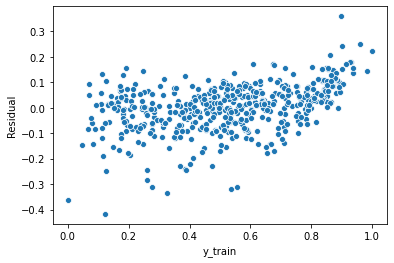

In [68]:
# Homoscedasticity
y_train_pred = lr6.predict(X_train_rfe6)
res = y_train - y_train_pred

sns.scatterplot(y_train, res)
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

# There is no such pattern in residual values, thus homoscedasticity is well preserved.

In [69]:
#Multi-collinearity
calculateVIF(X_train_rfe)

# VIF values for all the predictor variables are well below '5'. Thus, we can conclude there is no multi-collinearity between the 
# predictor variables.

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,misty,1.55
9,Sep,1.23
7,light_rain_&_snow,1.08
1,holiday,1.04


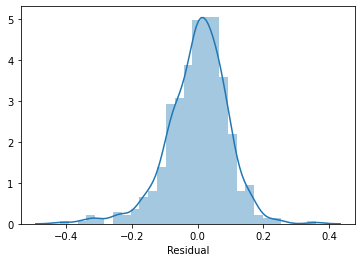

In [70]:
# Normality of error
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residual')
plt.show()

# From the distribution plot, we can conclude that the error terms are normally distributed having a mean around '0'.

In [71]:
# Auto-correlation

# As per our final model, 'Durbin-Watson value': 2.085. We know a Durbin-Watson value close to '2' means there is 
#no auto-correlation.

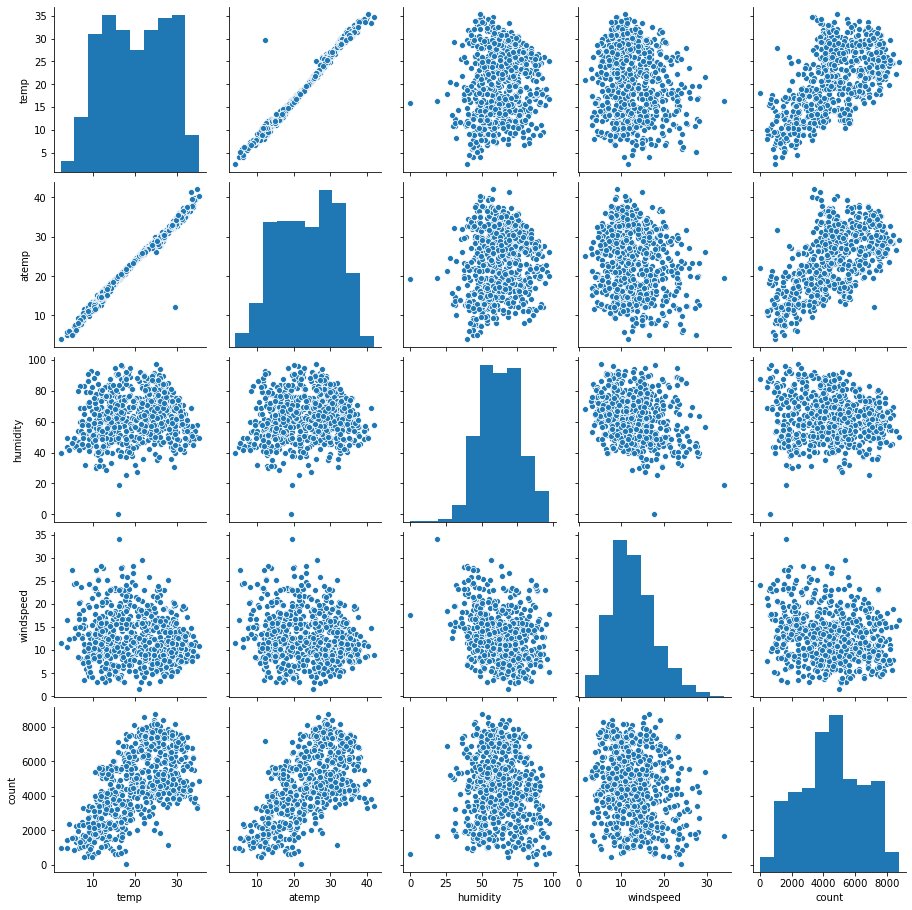

In [72]:
# Linear relationship
sns.pairplot(bike_numerical);

## Making predictions using final model

In [73]:
# Scaling 'df_test' dataframe
cols_test = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_test[cols_test] = scaler.transform(df_test[cols_test])

# Checking whether the scaler has worked properly or not using describe
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Dividing 'df_test' dataframe into 'X_test' and 'y_test'
y_test = df_test.pop('count')
X_test = df_test

In [75]:
# Selecting only those columns which were part of the final model
final_cols = X_train_rfe.columns

X_test = X_test[final_cols]

# Add a constant
X_test_rfe6 = sm.add_constant(X_test)

# Making prediction using the final model
y_test_pred = lr6.predict(X_test_rfe6)

## Model Evaluation

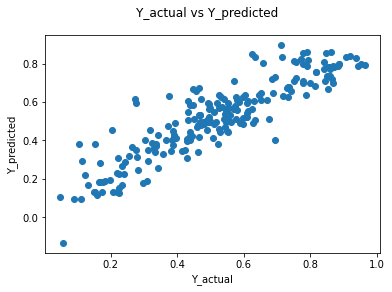

In [76]:
# Plotting 'y_test' and 'y_test_pred'
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y_actual')
plt.ylabel('Y_predicted')
plt.suptitle('Y_actual vs Y_predicted')
plt.show()

# Inference: There is a linear relationship between 'y_test' and 'y_test_pred'

In [77]:
# R-squared value for train dataset
print(round(r2_score(y_true = y_train, y_pred = y_train_pred),3))

# R-squared value for test dataset
print(round(r2_score(y_true = y_test, y_pred = y_test_pred),3))

0.833
0.804


In [78]:
# Adj-R2 for training dataset
print(round((lr6.rsquared_adj),3))

# 'N' is the sample size
N = X_test.shape[0]

# 'p' is the number of variables in our model, excluding the constant
p = X_test.shape[1]

# R-squared value for test dataset
r2 = round(r2_score(y_true = y_test, y_pred = y_test_pred),3)

# Adj-R2 for test dataset
adjusted_r2 = round(1-(1-r2)*(N-1)/(N-p-1),3)
print(adjusted_r2)

0.829
0.795


### Train and Test R2 and Adj-R2 results
- Train R-squared: 0.833 , Adj R-squared: 0.829
- Test  R-squared: 0.804 , Adj R-squared: 0.795

In [79]:
# Calculating RMSE (Root Mean Squared Error) for the model which is the square root of MSE (Mean Squared Error).
rmse = round(sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)),4)
rmse

# RMSE value for the test dataset is '0.0969' which indicates that the model is good.

0.0969

## Summary:
As per our final model, the top 3 predictor variables that influences bike bookings are:
- Temperature : A coefficient value of '0.477737' indicates that 'temp' has significant influence on bike bookings.
- Year : A coefficient value of '0.234132' indicates that the number of bike bookings are increasing every year.
- Light Rain and Snow (weathersit:3) : A coefficient value of '-0.285031' indicates when there is a light rainfall or snowfall, people generally don't rent out bikes.

#### Thus, management should give importance to these three variables to achieve maximum bike bookings and thus make maximum profit. 